This notebook intends to explain the effects of hyperparametric optimization on model's performance.

## Hyperparametric Optimization

Hyperparameters are those parameters of a model, which can't be found out during training of our model. They are not directly learned within the estimator. In scikit-learn they are passed as arguments to the constructor of the estimator classes. Typical examples include `C`, `kernel` and `gamma` for Support Vector Classifier, `alpha` for Lasso, `max_depth` and `min_samples_leaf` in decision tress etc.

The choice of hyperparameters can greatly influence model predictions. In scikit-learn, if we simply train a model, without passing the values of these hyperparameters, the model is trained on the default values. But, to improve model accuracy and to make our model robust, we must find the optimal values of the hyperparameters. 

One way to find the optimal hyperparameters is to train our model on different values of these hyperparameters and check accuracy on the validation set. In case of multiple hyperparameters, we need to make a grid having different values at each node as shown in the diagram below.

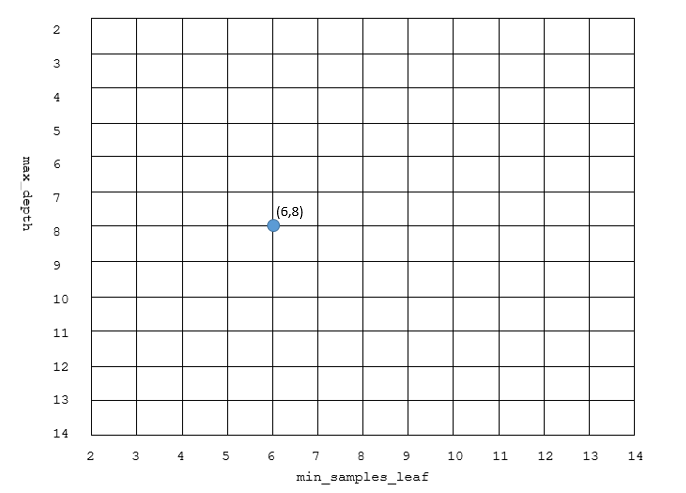

The validation error is calculated by testing model accuracy on the validation set after training it on training set using each combination of hyperparameters. To understand training, validation and testing errors, [please follow this link](https://datamaniac.tech/data_science/understanding-training-testing-and-validation-errors/).

## Scikit-Learn Implementation

Sklearn provides us a method to perform above grid operations easily using grid_search_cv. We will look at its implementation in this notebook. View this notebook on [Kaggle](https://www.kaggle.com/prasun2106/steps-for-hyperparametric-optimization)

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [17]:
df = pd.read_csv('../input/grid-search/data.csv',header = None)

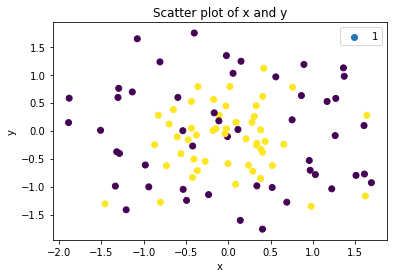

In [18]:
plt.figure()
plt.scatter(df.iloc[:,0],df.iloc[:,1],c = df.iloc[:,2])
plt.title('Scatter plot of x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [19]:
X = df.iloc[:,0:2]
y = df.iloc[:,2]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [21]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

In [22]:
from sklearn import metrics

In [24]:
print(f'accuracy = {metrics.accuracy_score(y_pred, y_test)}')
print('\n')
print(f'{metrics.classification_report(y_pred, y_test)}')
print('\n')
print(f'{metrics.confusion_matrix(y_pred, y_test)}')
print('\n')
print(f'f1_score_train = {metrics.f1_score(y_pred_train, y_train)}')
print('\n')
print(f'f1_score = {metrics.f1_score(y_pred, y_test)}')

accuracy = 0.7


              precision    recall  f1-score   support

         0.0       0.88      0.58      0.70        12
         1.0       0.58      0.88      0.70         8

    accuracy                           0.70        20
   macro avg       0.73      0.73      0.70        20
weighted avg       0.76      0.70      0.70        20



[[7 5]
 [1 7]]


f1_score_train = 1.0


f1_score = 0.7000000000000001


We can see that the f1 score for the training set is 1 and for the testing set it is 0.7. The large difference in training and testing f1 score denotes that we are dealing with the case of high variance (or overfitting). This fact can be understood on the basis of any standard model complexity graph which is as shown below:

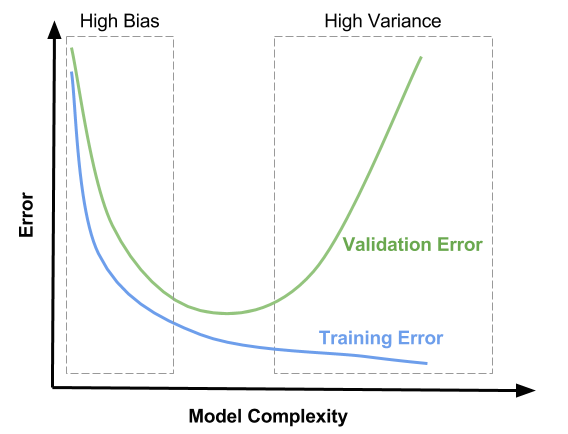

# Improving score using GridSearchCV and Cross Validation

In [25]:
from sklearn.model_selection import cross_val_score

In [28]:
score = cross_val_score(clf, X, y, cv = 5)
score

array([0.7 , 0.7 , 0.9 , 0.75, 0.55])

In [29]:
print(f'accuracy = {score.mean():0.2f} +/- {score.std()*2:0.2f}')

accuracy = 0.72 +/- 0.22


In [30]:
# cross validation using shuffle split
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits = 5, test_size = 0.3,random_state = 42)
score_shuffle = cross_val_score(clf, X, y, cv = cv)

In [31]:
print(f'accuracy = {score_shuffle.mean():0.2f} +/- {score_shuffle.std()*2:0.2f}')

accuracy = 0.64 +/- 0.28


# GridSearchCV

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score

#Choose the model
clf = DecisionTreeClassifier()

#Define the parameters
parameters = {'max_depth':np.arange(1,10), 
              'min_samples_split':np.arange(2,10),
               'min_samples_leaf': np.arange(1,10)}

#Make scorer
scorer = make_scorer(f1_score)

#Make Grid Seach Object
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

#Fit
grid_obj.fit(X_train, y_train)

#Find the best estimator
best_clf = grid_obj.best_estimator_

In [33]:
#Predict using the best clf
y_pred_grid = best_clf.predict(X_test)
y_pred_grid_train = best_clf.predict(X_train)

In [35]:

print(f'training set f1_score without grid search cv ={f1_score(y_pred_train, y_train)}')
print(f'testing set f1_score without grid search cv ={f1_score(y_pred, y_test)}')
print('\n')
print(f'training set f1_score using grid search cv ={f1_score(y_pred_grid_train, y_train)}')
print(f'testing set f1_score using grid search ={f1_score(y_pred_grid, y_test)}')



training set f1_score without grid search cv =1.0
testing set f1_score without grid search cv =0.7000000000000001


training set f1_score using grid search cv =0.8148148148148148
testing set f1_score using grid search =0.8


From the above results, if we are using grid search to optimize hyperparameters, our training set error is close to the testing set error and testing set error has increased too. It means that our model is making better prediction as well as it is able to generalize well.

## Conclusion

That's it for now. In this notebook, we understood the importance of hyperparametric optimization using a simple dataset. Please upvote if you find this notebook helpful, as it motivates me to write more tutorials for beginners. You can visit my website [datamaniac.tech](https://www.datamaniac.tech) for more such tutorials. Follow me on [Kaggle](https://www.kaggle.com/prasun2106), [Github](https://github.com/prasun2106) and contact me on [LinkedIn](https://www.linkedin.com/in/prasun-kumar-8250a5119/).
